# IRIS Flower Classification
Author: Charishma Nagandla </br>
Description: This script performs exploratory data analysis and classification on the Iris dataset.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay, 
    f1_score, accuracy_score, classification_report, 
    recall_score, precision_score, roc_auc_score, roc_curve
)

In [2]:
# load the data
iris_data = pd.read_csv('IRIS.csv')

## Dataset Overview

In [3]:
# Check the header and a few rows of data for iris dataset
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Check column types, missing values
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Get summary statistics
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#total rows in the iris dataset
print("Total number of rows:", len(iris_data))

Total number of rows: 150


In [7]:
# Get count and unique values count for each attribute
count_iris_data = pd.DataFrame({
    'count': iris_data.count(),
    'unique': iris_data.nunique()
})

print(count_iris_data)

              count  unique
sepal_length    150      35
sepal_width     150      23
petal_length    150      43
petal_width     150      22
species         150       3


In [8]:
#Check iris data for null values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### species is the target variable

In [9]:
# Get unique values for species
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
# Categorical Encoding of the target variable as machine learning models can only understand numbers.

category_mapping = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
iris_data["species"] = iris_data["species"].map(category_mapping)

In [11]:
# Get unique values for species
iris_data['species'].unique()

array([0, 1, 2], dtype=int64)

## Exploratory Data Analysis

C:\Users\chari\AppData\Local\Temp\ipykernel_8920\1471392520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=iris_data, palette='Set2')


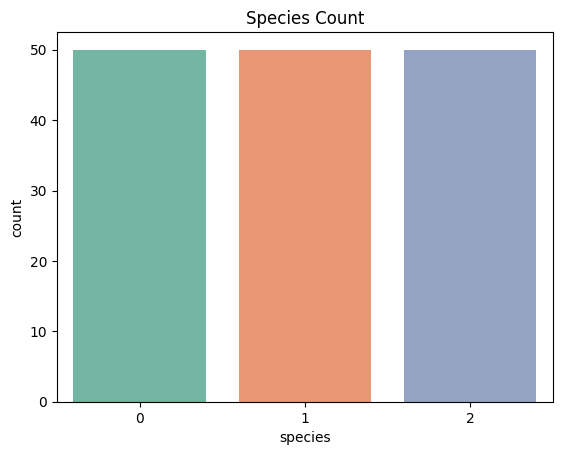

In [12]:
# Checking the count of the 3 different species count.

sns.countplot(x='species', data=iris_data, palette='Set2')
plt.title('Species Count')
plt.show()

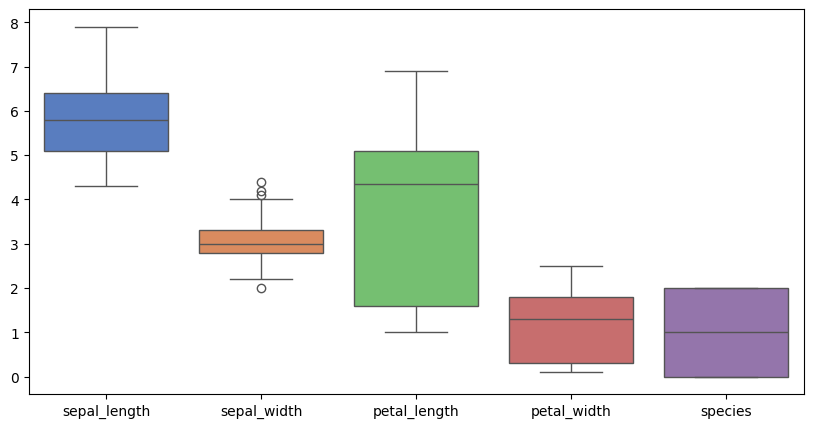

In [13]:
# checking outliers with boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=iris_data, palette='muted')
plt.show()

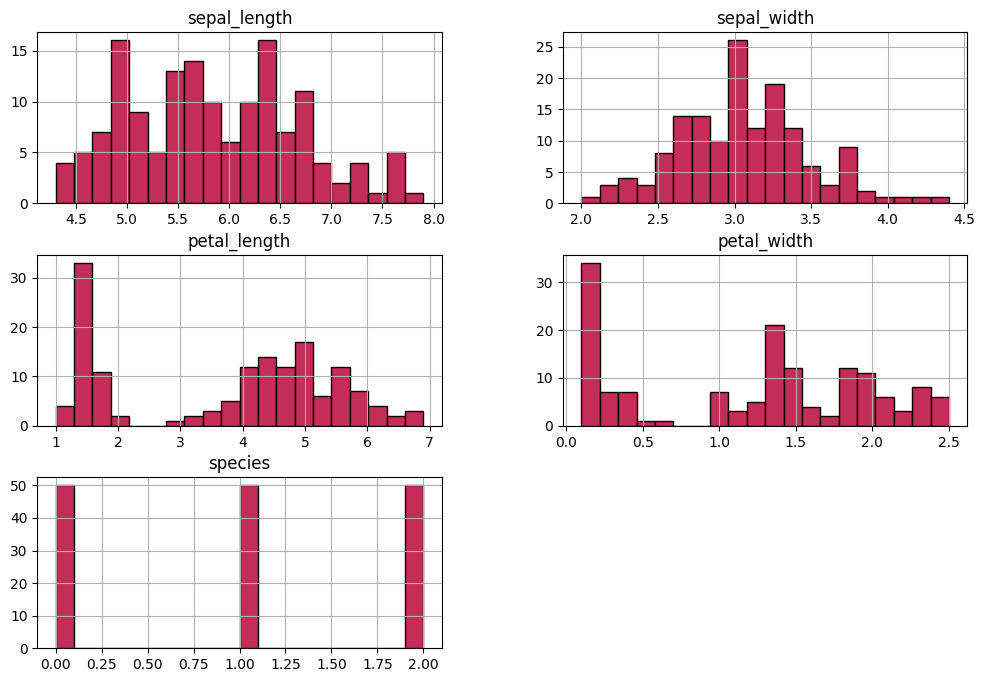

In [14]:
iris_data.hist(figsize=(12, 8), bins=20, color="#c42d58", edgecolor = "black")
plt.show()

              sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000    -0.109369      0.871754     0.817954  0.782561
sepal_width      -0.109369     1.000000     -0.420516    -0.356544 -0.419446
petal_length      0.871754    -0.420516      1.000000     0.962757  0.949043
petal_width       0.817954    -0.356544      0.962757     1.000000  0.956464
species           0.782561    -0.419446      0.949043     0.956464  1.000000


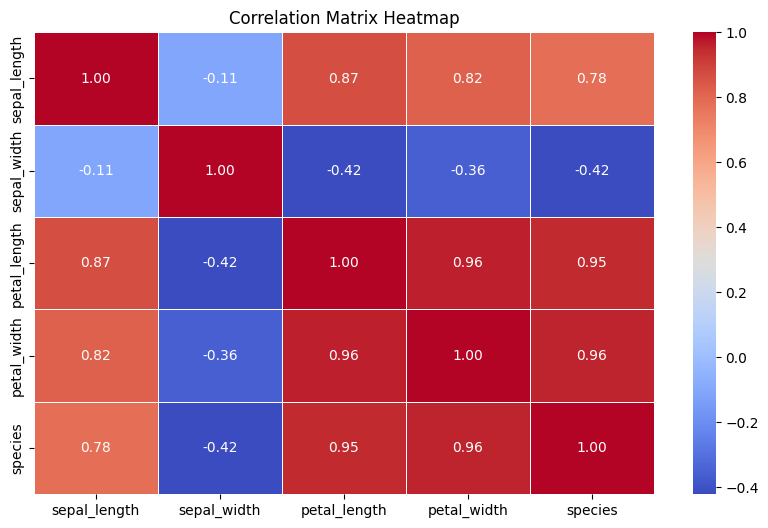

In [15]:
# Compute correlation matrix
correlation_matrix = iris_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


<Figure size 1500x1000 with 0 Axes>

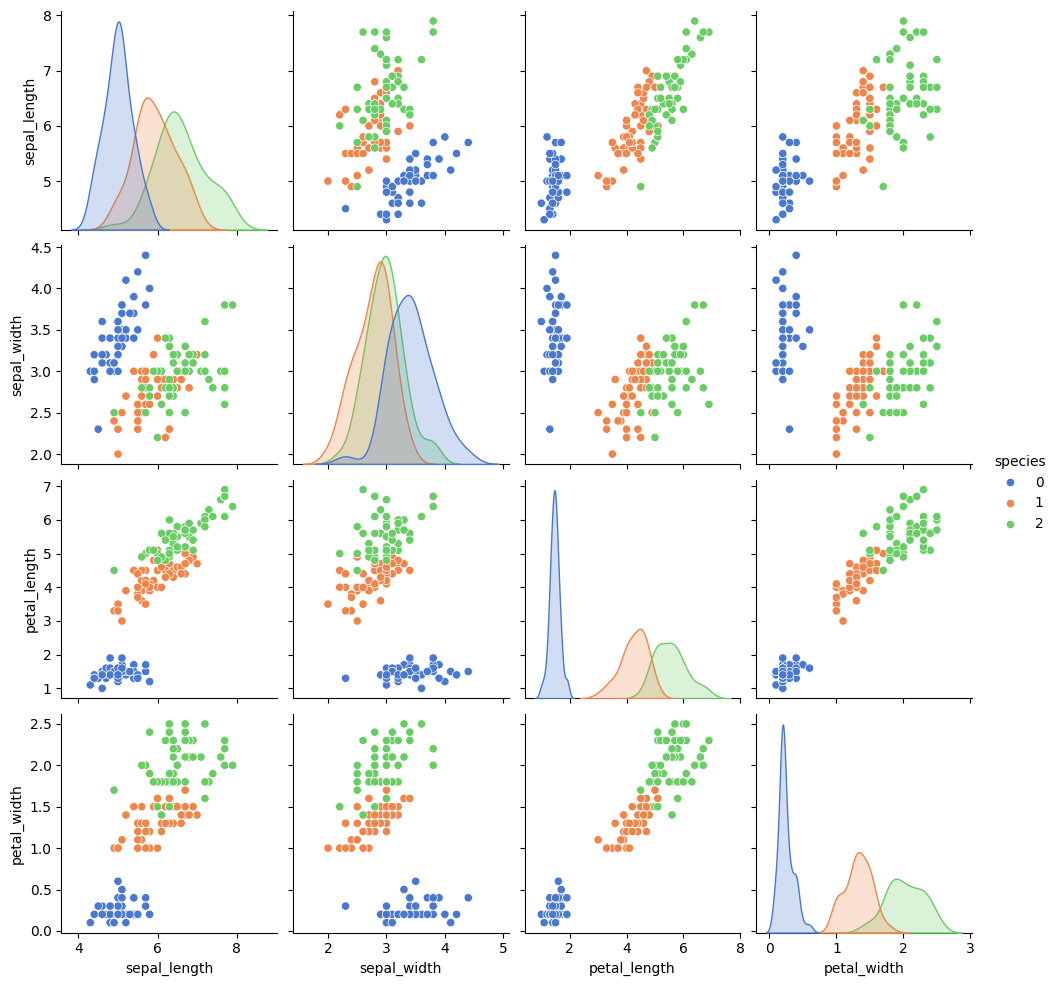

In [16]:
# scatter plot matrix
plt.figure(figsize=(15,10))
sns.pairplot(iris_data,hue="species",palette="muted")
plt.show()

## Machine Learning

#### Split dataset into training and testing and Standardizing columns

In [17]:
# Splitting the dataset (80% train, 20% test)
X = iris_data.drop(columns=['species'])  # Features
y = iris_data['species']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize (Fit only on training data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  

# Checking the shape of the datasets
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)


Training Set: (120, 4) (120,)
Testing Set: (30, 4) (30,)


#### Evaluation Metrics and Confusion Matrix for Model Performance

In [18]:
def metrics_score(y_test, y_pred, model):
    # Related Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Change 'binary' to 'weighted' or 'macro' for multiclass
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print Evaluation Metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plotting Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    model_table = pd.DataFrame([[model, accuracy, 1-recall, recall, precision, f1]],
               columns = ['Model', 'Accuracy', 'FalseNegRate', 'Recall', 'Precision', 'F1 Score'])
    
    return model_table

### 1. Logistic Regression

In [19]:
# import necessary libraries
from sklearn.linear_model import LogisticRegression

# Initializing the Logistic Regression model
lg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)

# Fit the Logistic Regression model
lg.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [20]:
# Make predictions on the test set
y_pred_lg = lg.predict(X_test)

Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



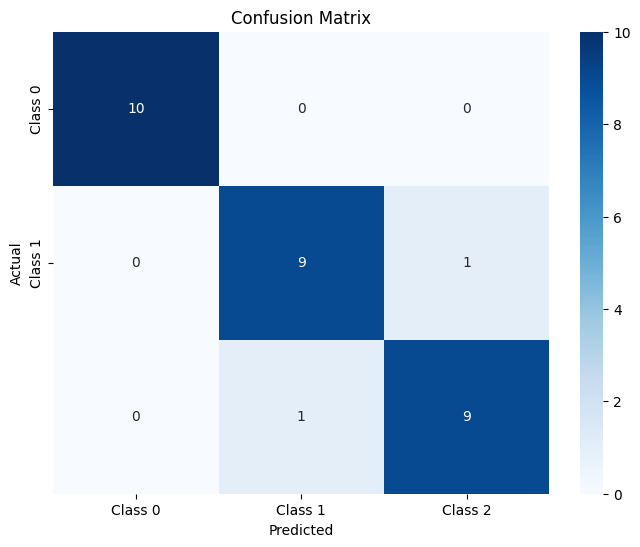

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Logistic Regression,0.933333,0.066667,0.933333,0.933333,0.933333


In [21]:
# Metrics evaluation
results = metrics_score(y_test, y_pred_lg,'Logistic Regression')
results

### 2. KNN

In [22]:
# import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Initializing the K-Nearest Neighbour model
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the K-Nearest Neighbour model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1-Score: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



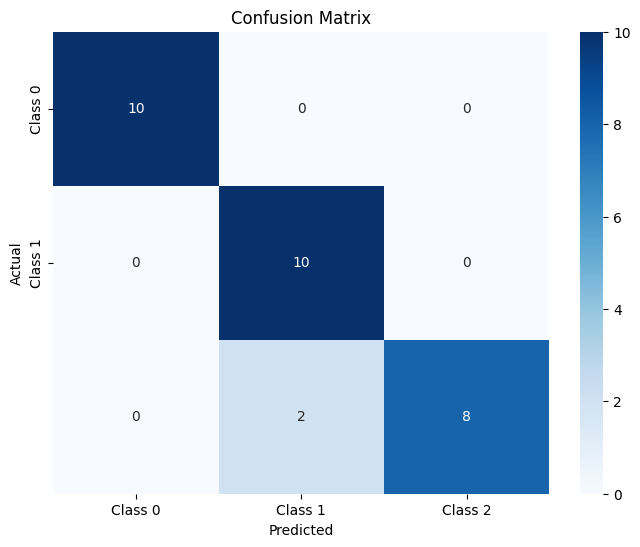

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Logistic Regression,0.933333,0.066667,0.933333,0.933333,0.933333
1,KNN,0.933333,0.066667,0.933333,0.944444,0.932660


In [24]:
knn_test = metrics_score(y_test,y_pred_knn,'KNN')
results = pd.concat([results, knn_test], ignore_index=True)
results

### 3. Naive Bayes

In [25]:
# import necessary libraries
from sklearn.naive_bayes import GaussianNB

# Initializing the Naive Bayesian model
nb = GaussianNB()

# Fit the Naive Bayesian model
nb.fit(X_train, y_train)

GaussianNB()

In [26]:
# Make predictions on the test set
y_pred_nb = nb.predict(X_test)

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



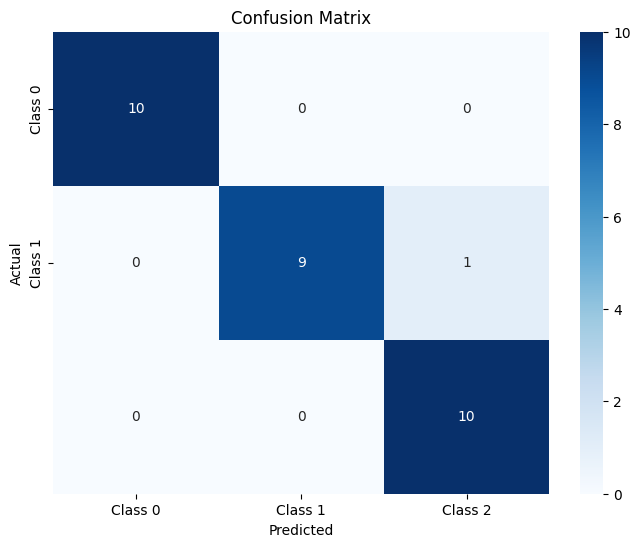

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Logistic Regression,0.933333,0.066667,0.933333,0.933333,0.933333
1,KNN,0.933333,0.066667,0.933333,0.944444,0.932660
2,Naive Bayesian,0.966667,0.033333,0.966667,0.969697,0.966583


In [27]:
# Metrics evaluation
nb_test = metrics_score(y_test, y_pred_nb,'Naive Bayesian')
results = pd.concat([results, nb_test], ignore_index=True)
results

### 4. Decision Tree

In [28]:
# import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Initializing the Decision Tree model
dt = DecisionTreeClassifier(random_state=42) 

# Fit the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
# Make predictions on the test set
y_pred_dt = dt.predict(X_test)

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-Score: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



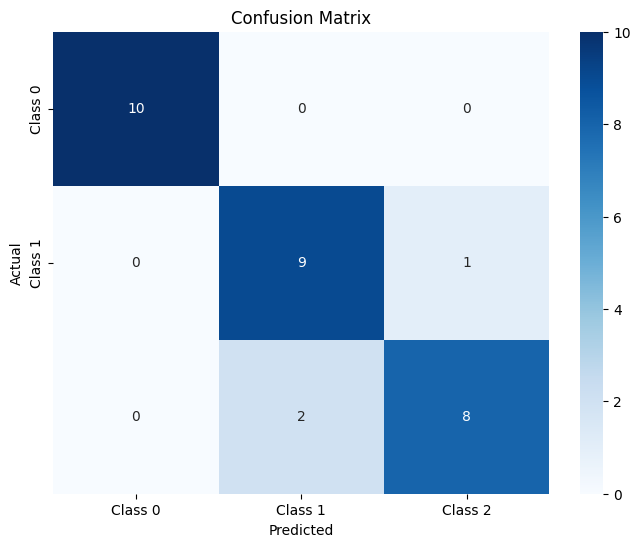

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Logistic Regression,0.933333,0.066667,0.933333,0.933333,0.933333
1,KNN,0.933333,0.066667,0.933333,0.944444,0.932660
2,Naive Bayesian,0.966667,0.033333,0.966667,0.969697,0.966583
3,Decision Tree,0.900000,0.100000,0.900000,0.902357,0.899749


In [30]:
# Metrics evaluation
dt_test = metrics_score(y_test, y_pred_dt,'Decision Tree')
results = pd.concat([results, dt_test], ignore_index=True)
results

### 5. SVM

In [31]:
# import necessary libraries
from sklearn.svm import SVC, LinearSVC

# Initializing the Support Vector Machine model
svm = LinearSVC()

# Fit the SVM model
svm.fit(X_train, y_train)

C:\Users\chari\anaconda3\envs\ml_env\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [32]:
# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-Score: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.80      0.84        10
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



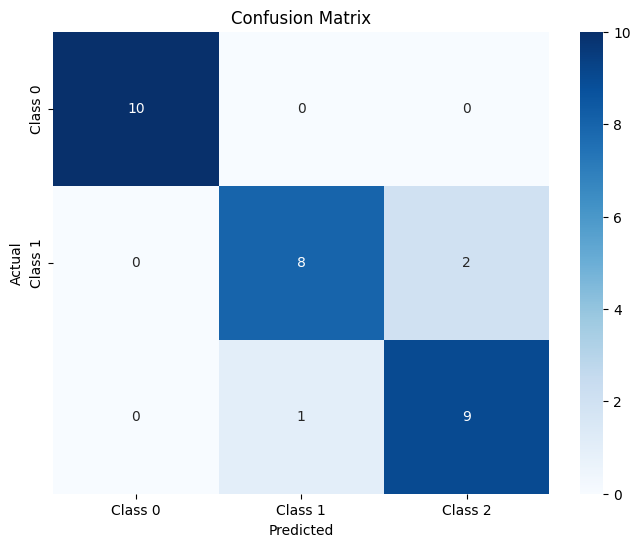

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Logistic Regression,0.933333,0.066667,0.933333,0.933333,0.933333
1,KNN,0.933333,0.066667,0.933333,0.944444,0.932660
2,Naive Bayesian,0.966667,0.033333,0.966667,0.969697,0.966583
3,Decision Tree,0.900000,0.100000,0.900000,0.902357,0.899749
4,SVM,0.900000,0.100000,0.900000,0.902357,0.899749


In [33]:
# Metrics evaluation
svm_test = metrics_score(y_test,y_pred_svm,'SVM')
results = pd.concat([results, svm_test], ignore_index=True)
results

## Algorithm Performance Metrics

In [34]:
results

,Model,Accuracy,FalseNegRate,Recall,Precision,F1 Score
0,Logistic Regression,0.933333,0.066667,0.933333,0.933333,0.933333
1,KNN,0.933333,0.066667,0.933333,0.944444,0.932660
2,Naive Bayesian,0.966667,0.033333,0.966667,0.969697,0.966583
3,Decision Tree,0.900000,0.100000,0.900000,0.902357,0.899749
4,SVM,0.900000,0.100000,0.900000,0.902357,0.899749
